In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
def uzorci_1D_vise_modova(m, sigma, P, N):
    M = len(m)
    X = np.zeros(N)
    index = 0
    for i in range(M):
        N_i = int(np.floor(P[i]*N))
        if i == M-1 and index+N_i<N:
            N_i += 1
        #X[index:index+N_i] = np.sqrt(sigma[i]) * np.random.randn(N_i) + m[i]
        X[index:index+N_i] = np.random.normal(m[i], np.sqrt(sigma[i]), N_i)
        index += N_i
    return X

In [3]:
def raspodela_1D_vise_modova(m, sigma, P, korak_raspodele):
    M = len(m)
    x_min = np.min(m); x_max = np.max(m)
    sigma_max = np.max(sigma)
    x = np.arange(x_min-3*np.sqrt(sigma_max), x_max+3*np.sqrt(sigma_max), korak_raspodele)
    F = np.zeros(len(x))
    for i in range(M):
        F += P[i]*scipy.stats.multivariate_normal.pdf(x, m[i], sigma[i]).T
    plt.plot(x, F)

In [4]:
def estimacija_1D_KDE(X, h, korak_raspodele):
    x_min = np.min(X)
    x_max = np.max(X)
    N = X.shape[0]
    
    d = 1
    #k = 0
    
    #p_procena = np.zeros(np.arange(x_min, x_max, korak_raspodele).shape)
    p_procena = []
    
    for i in np.arange(x_min, x_max, korak_raspodele):
        #unutar_prozora = 0
        #for x_tmp in X:
        #    if np.absolute(x_tmp-i)<h/2:
        #        unutar_prozora += 1
        unutar_prozora = np.absolute(np.tile(i, X.shape[0])-X) < h/2
        p_procena.append(np.sum(unutar_prozora)/N/(h**d))
        #p_procena[k] = np.sum(unutar_prozora)/N/(h**d)
        #k += 1
    return p_procena, x_min, x_max

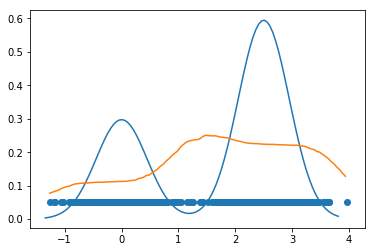

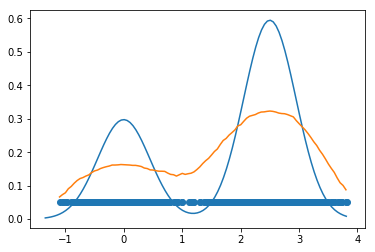

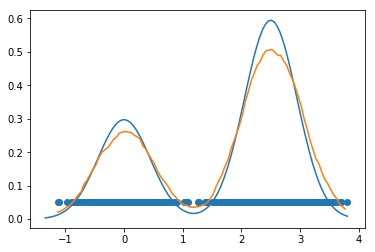

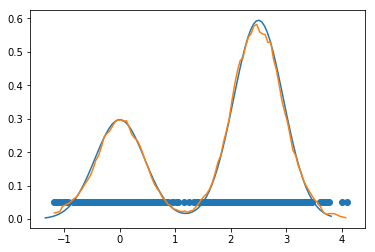

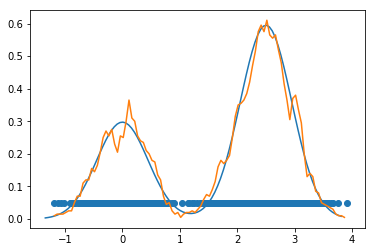

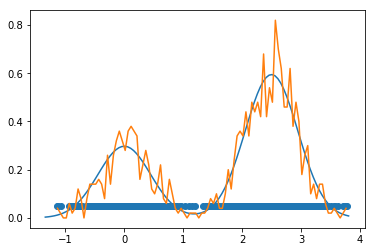

In [5]:
P = [1/3, 2/3] #udeo modova u raspodeli
m = [0, 2.5] #vektor pozicija (srednjih vrednosti) pojedinacnih modova
sigma = [0.2, 0.2] #vektor varijansi pojedinih modova
np.random.seed(125)

# 1. Promenljiva sirina prozora h
korak_raspodele = 0.05
N = 1000
h = [3, 2, 1, 0.5, 0.2, 0.05]

for j in range(len(h)):
    X = uzorci_1D_vise_modova(m, sigma, P, N)
    p_procena, x_min, x_max = estimacija_1D_KDE(X, h[j], korak_raspodele)
    fig = plt.figure()
    raspodela_1D_vise_modova(m, sigma, P, korak_raspodele)
    plt.plot(np.arange(x_min, x_max, korak_raspodele), p_procena)
    plt.scatter(X,0.05*np.ones(X.shape))

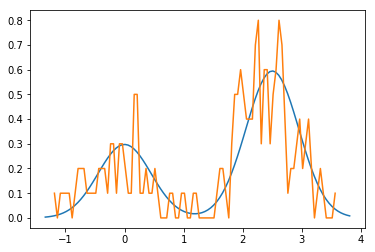

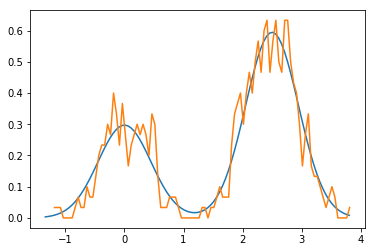

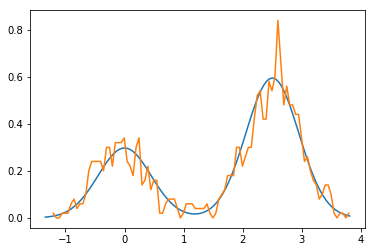

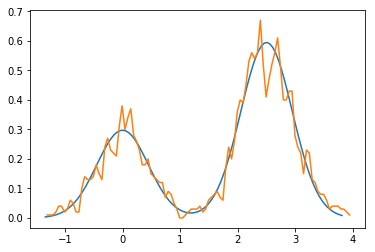

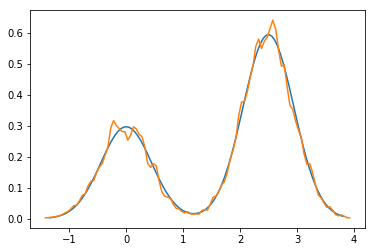

In [6]:
# 2. Promenljiv broj uzoraka N
korak_raspodele = 0.05
h = 0.1
N = [100, 300, 500, 1000, 10000]

for j in range(len(N)):
    X = uzorci_1D_vise_modova(m, sigma, P, N[j])
    p_procena, x_min, x_max = estimacija_1D_KDE(X, h, korak_raspodele)
    fig = plt.figure()
    raspodela_1D_vise_modova(m, sigma, P, korak_raspodele)
    plt.plot(np.arange(x_min, x_max, korak_raspodele), p_procena)
    

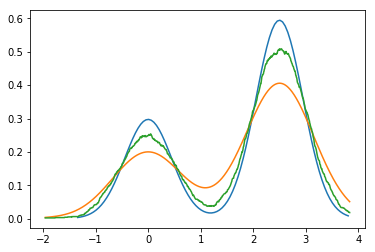

In [7]:
from sklearn.neighbors import KernelDensity

P = [1/3, 2/3] #udeo modova u raspodeli
m = [0, 2.5] #vektor pozicija (srednjih vrednosti) pojedinacnih modova
sigma = [0.2, 0.2] #vektor varijansi pojedinih modova
N=1000
korak_raspodele = 0.05
X = uzorci_1D_vise_modova(m, sigma, P, N)[:, np.newaxis]
X_plot = np.linspace(np.min(X), np.max(X), N)[:, np.newaxis]

fig, ax = plt.subplots()
raspodela_1D_vise_modova(m, sigma, P, korak_raspodele)

for kernel in ['gaussian', 'tophat']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens))



In [8]:
print(X.shape)
print(X_plot.shape)
print(log_dens.shape)

(1000, 1)
(1000, 1)
(1000,)
